In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = [15,5]

In [2]:
print("\U0001F602")

😂


In [3]:
np.random.seed(0)

In [4]:
# implementing y = mx+c
m = 0.4
b = 2
off = 0.2
x = np.arange(0,10,0.1)
y = m*x + b + np.random.normal(-off,off,len(x))

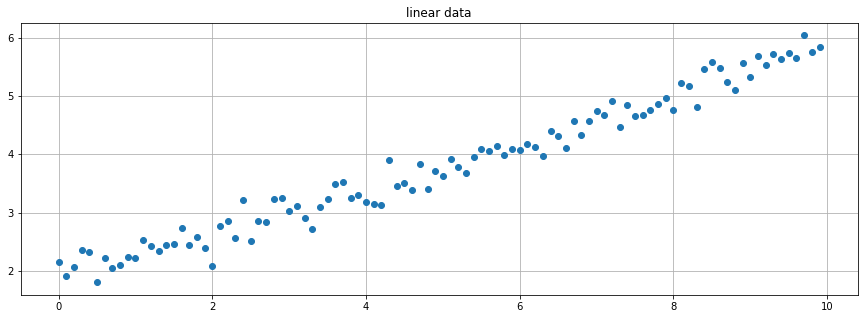

In [5]:
plt.plot(x,y,'o')
plt.grid()
plt.title('linear data')
plt.show()

In [6]:
alpha = 0.05
epoch = 1000
theta0 = np.random.uniform()
theta1 = np.random.uniform()

In [7]:
costData = []
for ii in range(epoch):
    h = theta1*x+theta0                          # model fit
    diff = h-y
    cost = np.sum(np.square(diff))/(2*len(x))    # cost computation 
    costData.append(cost)
    theta0 = theta0 - alpha*np.sum(diff)/len(x)
    theta1 = theta1 - alpha*np.sum(np.dot(diff,x))/len(x)
    
print('slop m = ',theta1)
print('     c = ',theta0)

slop m =  0.39399421364543097
     c =  1.841688911273052


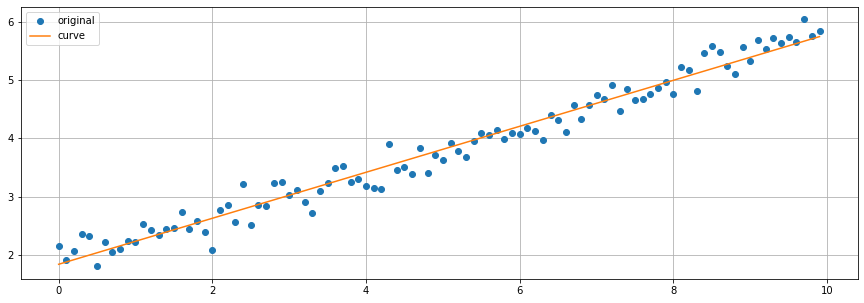

In [8]:
plt.plot(x,y,'o',label='original')
plt.plot(x,theta1*x+theta0,label='curve')
plt.legend()
plt.grid()
plt.show()

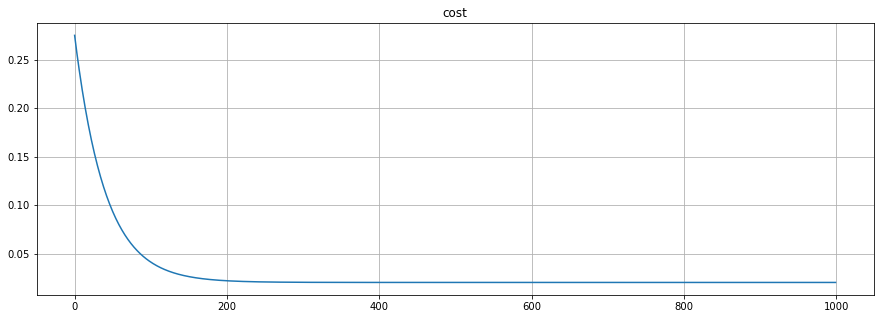

In [9]:
plt.plot(costData)
plt.grid()
plt.title('cost')
plt.show()

In [10]:
def linearReg(x,y,epoch=1000,alpha=0.05):    #x = features,y = output
    if len(x.shape) == 1:
        x = np.expand_dims(x,1)
    if len(y.shape) == 1:
        y = np.expand_dims(y,1)
    a,b = x.shape
    if a<b:
        return None
    x = np.c_[np.ones([a,1]),x]    # expanding dimension for constant
    weights = np.random.uniform(0,1,[b+1,1])
    cost=[]
    for ii in range(epoch):
        h = np.dot(x,weights)
        h_y = h-y
        costTemp = np.sum(np.square(h_y))/(2*a)
        cost.append(costTemp)
        temp = np.expand_dims(np.sum(x*h_y,axis=0)/a,1)
        weights = weights - alpha*temp
    print(weights)
    return cost

In [11]:
gg = linearReg(x,y,epoch=1000,alpha=0.05)

[[1.84168758]
 [0.39399442]]


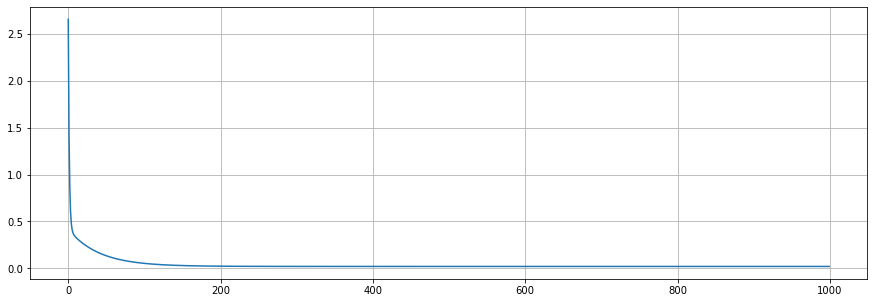

In [12]:
plt.plot(gg)
plt.grid()
plt.show()

In [13]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
model.coef_[0]

0.39399339667443545

In [14]:
x1x2 = []
yy = []
for ii in range(5):
    for jj in range(10):
        x1x2.append([ii,jj])
        yy.append(10*ii-2*jj+2)
x1x2 = np.array(x1x2)
yy = np.array(yy)

In [15]:
dd = linearReg(x1x2,yy,epoch=1000,alpha=0.05)

[[ 2.00003869]
 [ 9.99999256]
 [-2.00000378]]


In [16]:
model = LinearRegression()
model.fit(x1x2, yy)
model.coef_

array([10., -2.])